**Daniel Yu**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [19]:
iris_data = pd.read_csv('data/iris.csv')
iris_data = iris_data.drop(labels='species', axis=1)
print(iris_data.head(5))

   sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

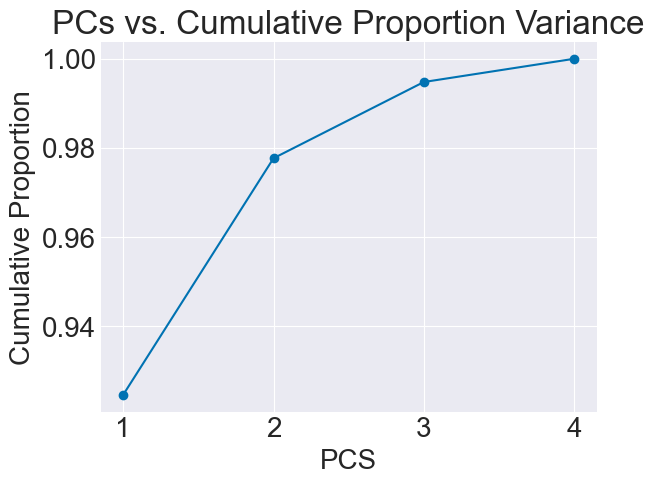

In [25]:
from pca import PCA
iris_pca = PCA(iris_data)
iris_headers = list(iris_data.columns)
iris_pca.fit(iris_headers)
#1
iris_pca.elbow_plot()
plt.show()

#2
Typically, our threshold of preservasion is 90%, and our 1st PC already encompasses that threshold, so we could just keep that 1 PC. This is because the other 3 PCs give only 4-1% more variance, which we can live without.

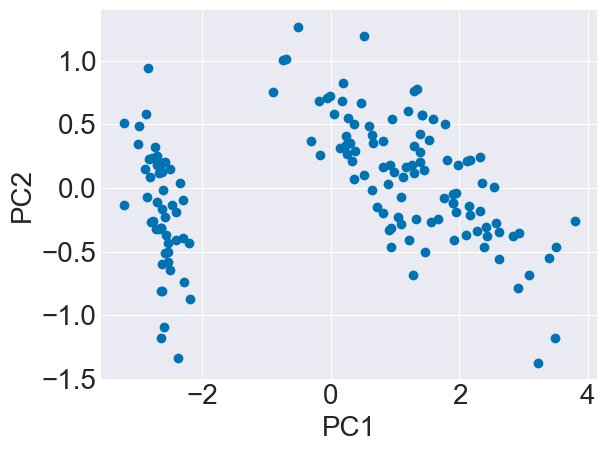

In [28]:
#3
pcs_to_keep = np.arange(2)
iris_proj = iris_pca.pca_project(pcs_to_keep)
plt.plot(iris_proj[:, 0], iris_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

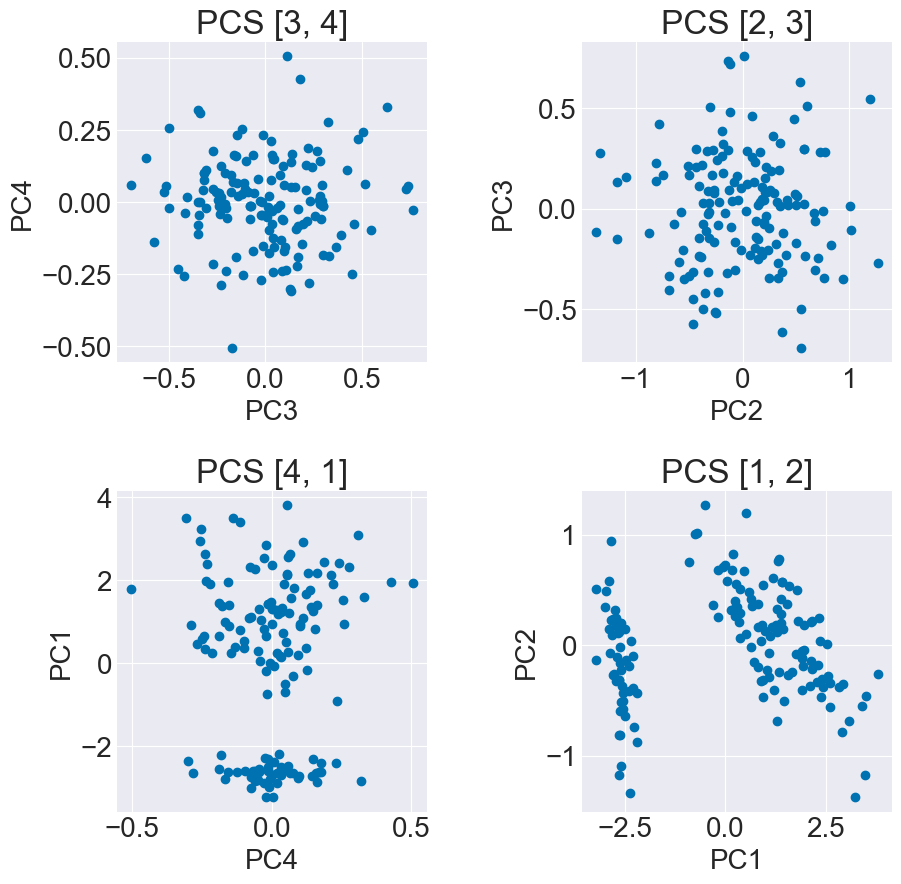

In [31]:
fig, axs = plt.subplots(2, 2, figsize = (10,10))

iris_proj = iris_pca.pca_project([2,3])
axs[0,0].set_title("PCS [3, 4]")
axs[0,0].set_xlabel("PC3")
axs[0,0].set_ylabel("PC4")
axs[0,0].scatter(iris_proj[:, 0], iris_proj[:, 1])

iris_proj = iris_pca.pca_project([1,2])
axs[0,1].set_title("PCS [2, 3]")
axs[0,1].set_xlabel("PC2")
axs[0,1].set_ylabel("PC3")
axs[0,1].scatter(iris_proj[:, 0], iris_proj[:, 1])

iris_proj = iris_pca.pca_project([3,0])
axs[1,0].set_title("PCS [4, 1]")
axs[1,0].set_xlabel("PC4")
axs[1,0].set_ylabel("PC1")
axs[1,0].scatter(iris_proj[:, 0], iris_proj[:, 1])

iris_proj = iris_pca.pca_project([0,1])
axs[1,1].set_title("PCS [1, 2]")
axs[1,1].set_xlabel("PC1")
axs[1,1].set_ylabel("PC2")
axs[1,1].scatter(iris_proj[:, 0], iris_proj[:, 1])

plt.subplots_adjust(hspace=0.4, wspace = 0.5)

plt.show()

### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** We know that each PC goes in order of how much contribute to the variance in data, so each plot combination of different PCs tell us how close we are towards getting a shape based on which ones we pick. Generally, keeping PC1 has a better representation of the data, since the clusters of the data are shown, which represents the dataset. While without PC1, as shown from the two graphs at the top, the data has a lot of noise and is a lot more random, not providing an accurate example of the data given.

### 3e. Reconstruct data based on PCs

In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.

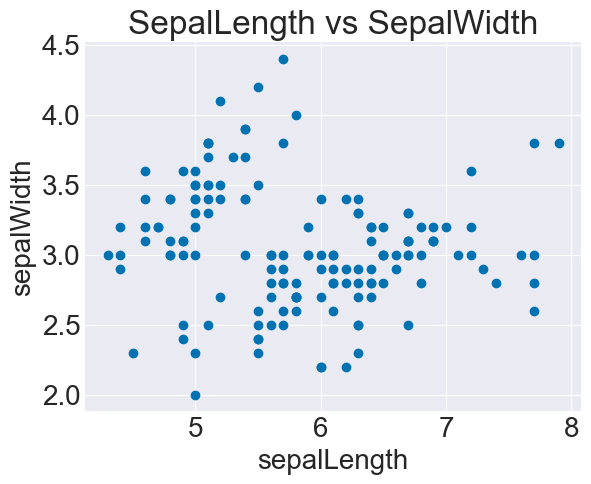

In [32]:
# Plot original iris data
plt.scatter(iris_data['sepalLength'], iris_data['sepalWidth'])
plt.title("SepalLength vs SepalWidth")
plt.xlabel("sepalLength")
plt.ylabel("sepalWidth")
plt.show()

In the cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

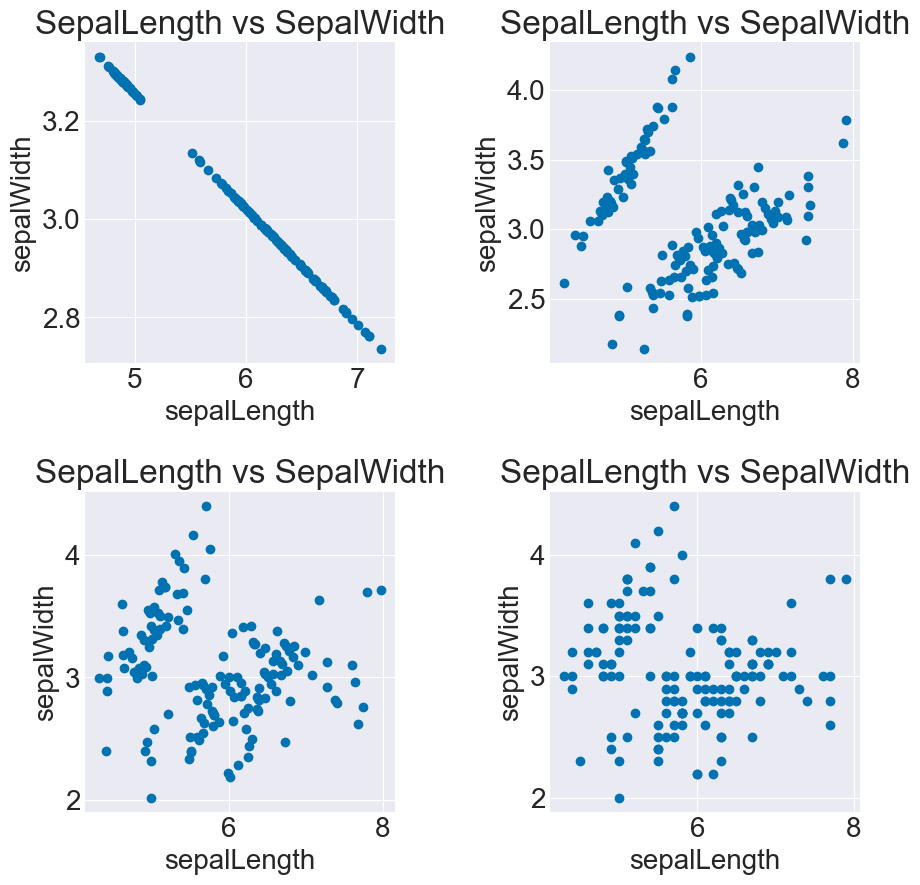

In [34]:
# 2x2 grid of scatter plots
fig, axs = plt.subplots(2, 2, figsize = (10,10))

iris_proj = iris_pca.pca_then_project_back(1)
axs[0,0].set_title("SepalLength vs SepalWidth")
axs[0,0].set_xlabel("sepalLength")
axs[0,0].set_ylabel("sepalWidth")
axs[0,0].scatter(iris_proj[:, 0], iris_proj[:, 1])

iris_proj = iris_pca.pca_then_project_back(2)
axs[0,1].set_title("SepalLength vs SepalWidth")
axs[0,1].set_xlabel("sepalLength")
axs[0,1].set_ylabel("sepalWidth")
axs[0,1].scatter(iris_proj[:, 0], iris_proj[:, 1])

iris_proj = iris_pca.pca_then_project_back(3)
axs[1,0].set_title("SepalLength vs SepalWidth")
axs[1,0].set_xlabel("sepalLength")
axs[1,0].set_ylabel("sepalWidth")
axs[1,0].scatter(iris_proj[:, 0], iris_proj[:, 1])

iris_proj = iris_pca.pca_then_project_back(4)
axs[1,1].set_title("SepalLength vs SepalWidth")
axs[1,1].set_xlabel("sepalLength")
axs[1,1].set_ylabel("sepalWidth")
axs[1,1].scatter(iris_proj[:, 0], iris_proj[:, 1])

plt.subplots_adjust(hspace=0.4, wspace = 0.5)

plt.show()

### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** The 2x2 grid demonstrates that as the number of PCs used to demonstrate the data increases, the information of the data gets better, and such that more distinct properties of the original data are preserved. So it makes sense that re-projecting on all four PCs (Which is what we started with) will give the original dataset back. In terms of how well each re-projection preserve properties, they do pretty well, even with something as simple as the first graph, you can still see 2 clusters. The graphs just get better as the PCs increase. 